Episode 0


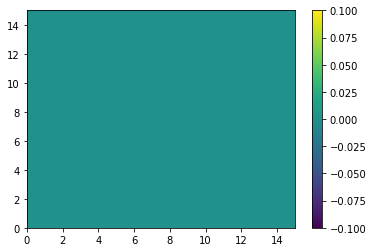

Episode 100


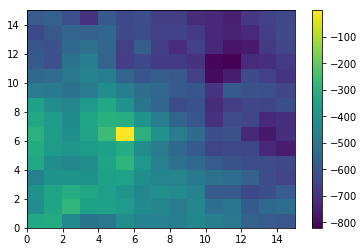

Episode 200


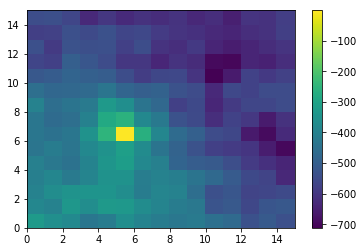

Episode 300


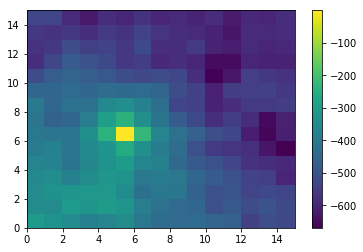

Episode 400


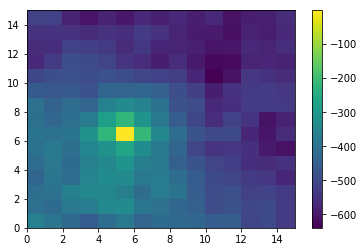

Episode 500


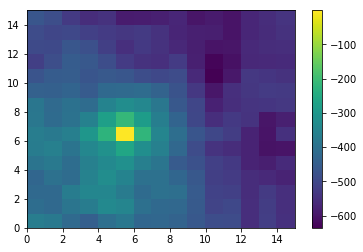

Episode 600


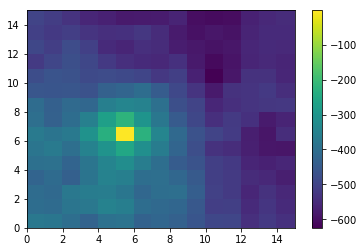

Episode 700


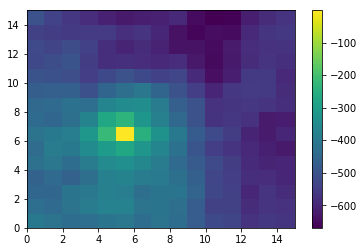

Episode 800


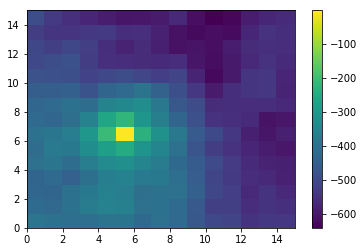

Episode 900


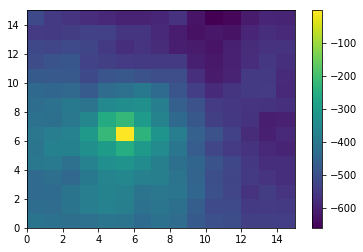

Episode 1000


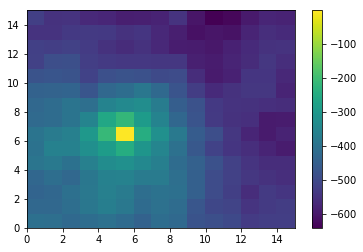

Episode 1100


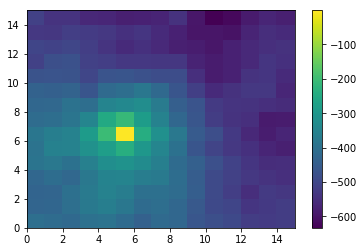

Episode 1200


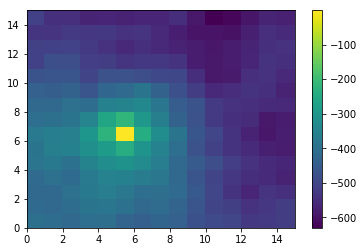

Episode 1300


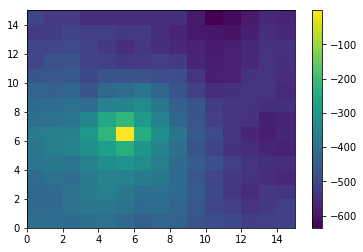

Episode 1400


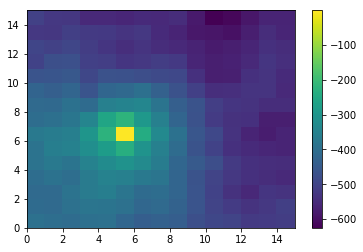

Episode 1500


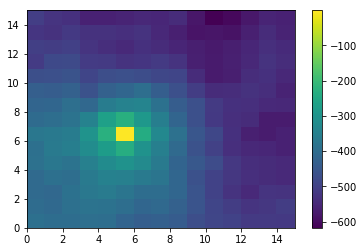

Episode 1600


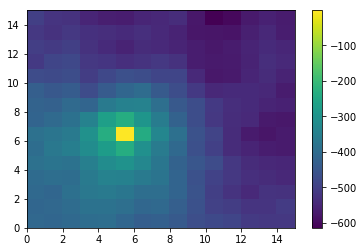

Episode 1700


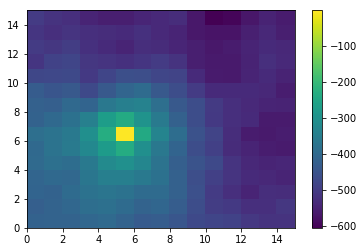

Episode 1800


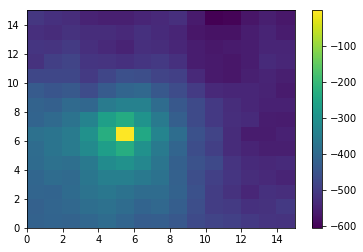

Episode 1900


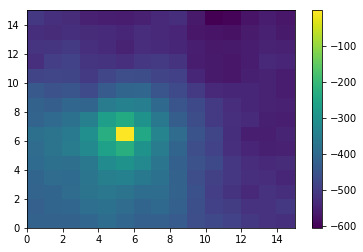

Episode 2000


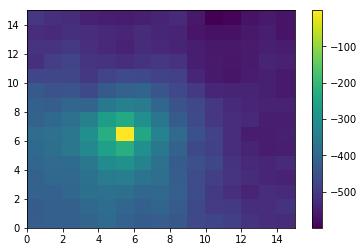

Episode 2100


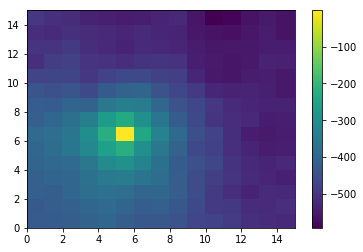

Episode 2200


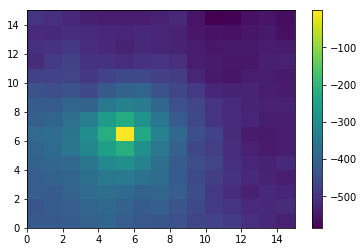

Episode 2300


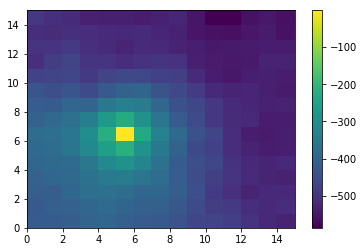

Episode 2400


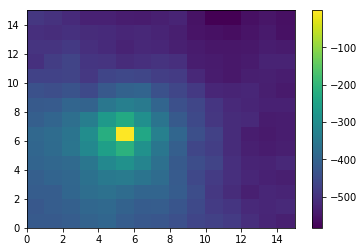

Episode 2500


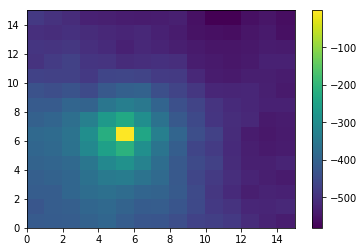

Episode 2600


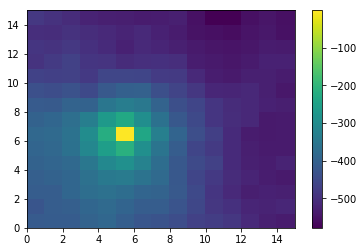

Episode 2700


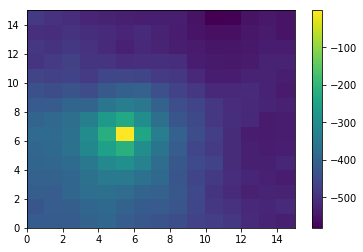

Episode 2800


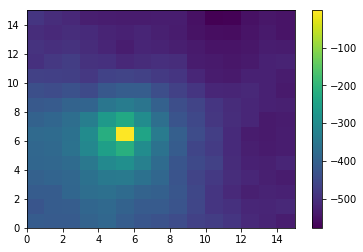

Episode 2900


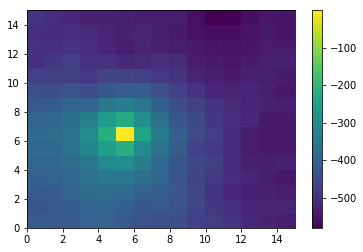

Episode 3000


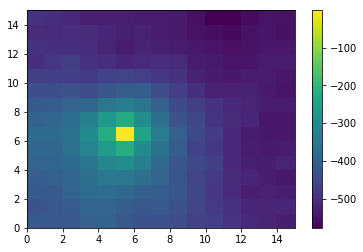

Episode 3100


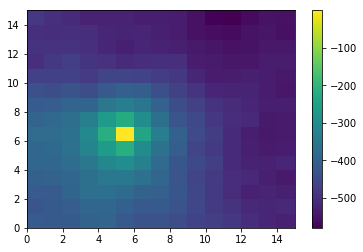

Episode 3200


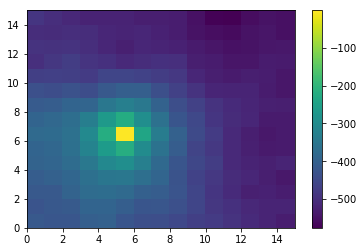

Episode 3300


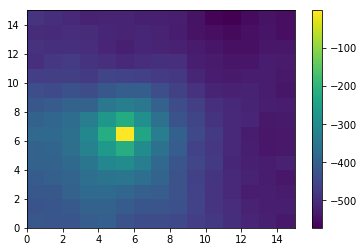

Episode 3400


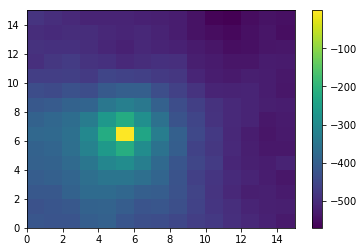

Episode 3500


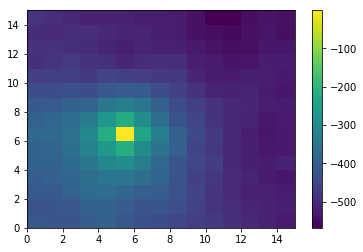

Episode 3600


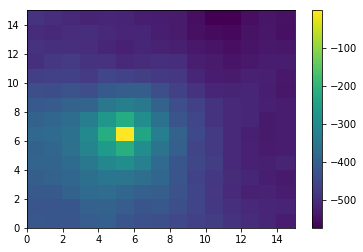

Episode 3700


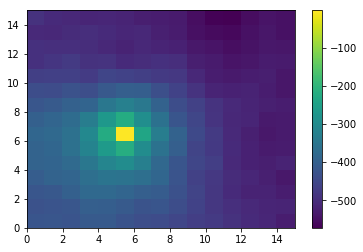

Episode 3800


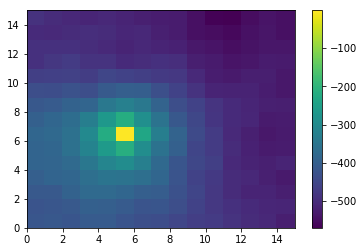

Episode 3900


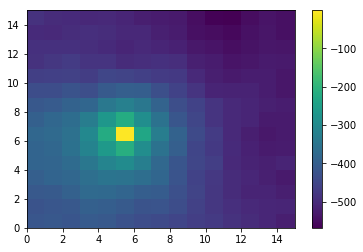

Episode 4000


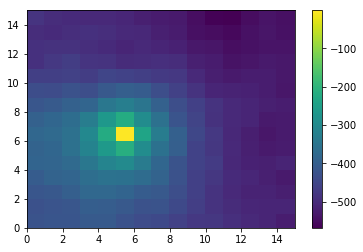

Episode 4100


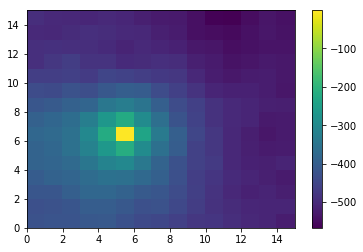

Episode 4200


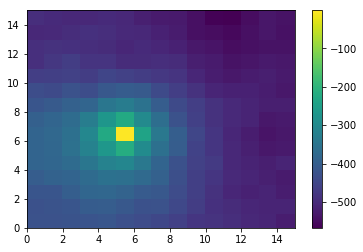

Episode 4300


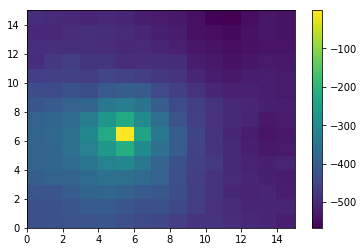

Episode 4400


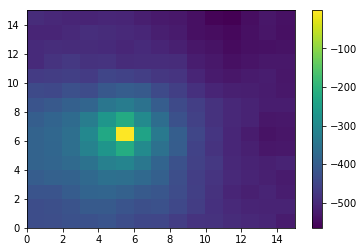

Episode 4500


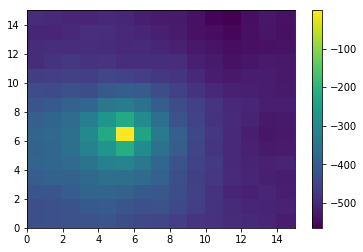

Episode 4600


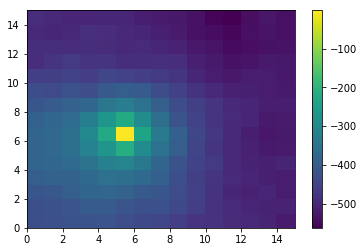

Episode 4700


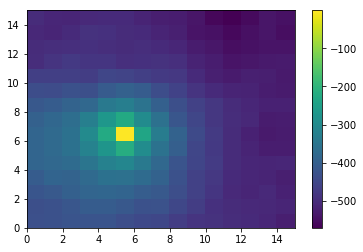

Episode 4800


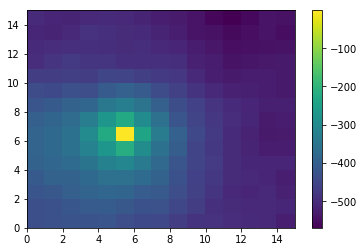

Episode 4900


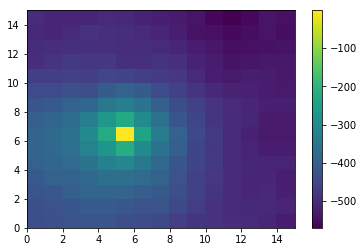

Episode 5000


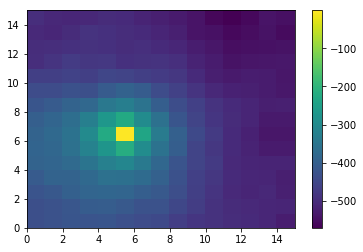

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import EveryVisitMonteCarlo
from myelin.core import RLInteraction, MDPEnvironment
from myelin.mdps.gridworld import GridWorld
from myelin.policies import RandomPolicy
from myelin.utils import Callback

ROWS, COLS = 15, 15
mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)
value_function = np.zeros((ROWS, COLS))
agent = EveryVisitMonteCarlo(policy, value_function)


###########
# Display #
###########


def display():
    np.set_printoptions(precision=4, linewidth=200)
    plt.pcolormesh(value_function)
    plt.colorbar()
    plt.show()


##########################
# Termination conditions #
##########################


def max_episodes(info):
    return info['episode'] == 1000


#############
# Callbacks #
#############


class LearningMonitor(Callback):
    def on_episode_begin(self, episode):
        if episode % 100 == 0:
            print('Episode {}'.format(episode))
            display()

    def on_train_end(self, episode):
        print('Episode {}'.format(episode))
        display()


#################################
# Agent-Environment Interaction #
#################################


rl_interaction = RLInteraction(
    env=env,
    agent=agent,
    callbacks=[LearningMonitor()],
    termination_conditions=[max_episodes]
)

rl_interaction.start()
